##Importing Dataset


In [2]:
# pip install matplotlib


##Importing libraries

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential

##Data Preprocessing

##Training Image preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Millets_dataset/millets3/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 700 files belonging to 7 classes.


##Validation Image Preprocessing

In [5]:

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Millets_dataset/millets3/validate',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 140 files belonging to 7 classes.


##Building Model

In [6]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu')) #added to make neural network more deeper
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
#again convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2)) #pooling

In [9]:
cnn.add(tf.keras.layers.Flatten())


In [10]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))


In [11]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu')) #2 times to make neural network more deeper

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [13]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=7,activation='softmax'))


##Compiling and Training Phase

In [14]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

In [16]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
22/22 [==============================] - 237s 7s/step - loss: 12.2486 - accuracy: 0.1657 - val_loss: 1.9552 - val_accuracy: 0.2000
Epoch 2/32
22/22 [==============================] - 72s 2s/step - loss: 1.9103 - accuracy: 0.2086 - val_loss: 1.9245 - val_accuracy: 0.1857
Epoch 3/32
22/22 [==============================] - 82s 3s/step - loss: 1.8918 - accuracy: 0.2086 - val_loss: 1.8432 - val_accuracy: 0.2429
Epoch 4/32
22/22 [==============================] - 75s 3s/step - loss: 1.8485 - accuracy: 0.2200 - val_loss: 1.8002 - val_accuracy: 0.2786
Epoch 5/32
22/22 [==============================] - 73s 2s/step - loss: 1.7937 - accuracy: 0.2914 - val_loss: 1.6555 - val_accuracy: 0.2929
Epoch 6/32
22/22 [==============================] - 75s 3s/step - loss: 1.6934 - accuracy: 0.3129 - val_loss: 1.5383 - val_accuracy: 0.3857
Epoch 7/32
22/22 [==============================] - 74s 3s/step - loss: 1.6876 - accuracy: 0.3114 - val_loss: 1.5568 - val_accuracy: 0.3929
Epoch 8/32
22/22 [

##Evaluating model

In [17]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


22/22 [==============================] - 69s 2s/step - loss: 0.0263 - accuracy: 0.9929
Training accuracy: 0.9928571581840515


In [18]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

5/5 [==============================] - 6s 119ms/step - loss: 0.3304 - accuracy: 0.9643
Validation accuracy: 0.9642857313156128


##Test set evaluation

In [19]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Millets_dataset/millets3/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 140 files belonging to 7 classes.


##Saving Model

In [20]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
training_history.history #Return Dictionary of history

{'loss': [12.248562812805176,
  1.9102975130081177,
  1.8917940855026245,
  1.848543405532837,
  1.7937432527542114,
  1.6933962106704712,
  1.687556505203247,
  1.580003023147583,
  1.4686414003372192,
  1.4450173377990723,
  1.2643736600875854,
  1.1563773155212402,
  1.1365740299224854,
  0.9442176222801208,
  0.7887547016143799,
  0.7792816758155823,
  0.6441118717193604,
  0.5928764939308167,
  0.517366886138916,
  0.40031668543815613,
  0.3316119909286499,
  0.2958940267562866,
  0.2441590279340744,
  0.31270718574523926,
  0.2768271863460541,
  0.383514940738678,
  0.18148940801620483,
  0.15998421609401703,
  0.08875566720962524,
  0.06970194727182388,
  0.08775188773870468,
  0.054899755865335464],
 'accuracy': [0.16571427881717682,
  0.2085714340209961,
  0.2085714340209961,
  0.2199999988079071,
  0.2914285659790039,
  0.31285715103149414,
  0.31142857670783997,
  0.37285715341567993,
  0.4342857003211975,
  0.4514285624027252,
  0.5271428823471069,
  0.6000000238418579,
  0

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [24]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 96.42857313156128 %


##Accuracy Visualization

##Training Visualization

In [25]:
#training_history.history['accuracy']

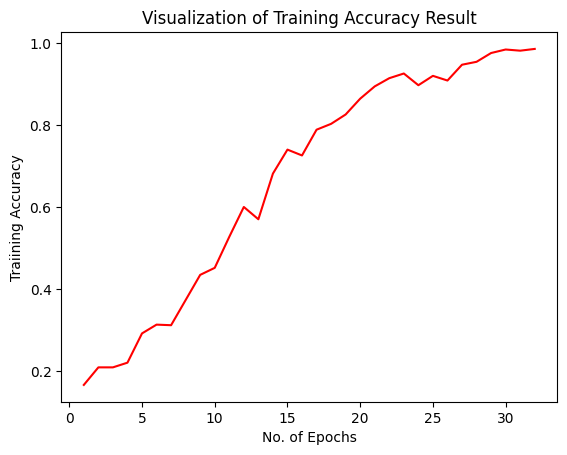

In [26]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy


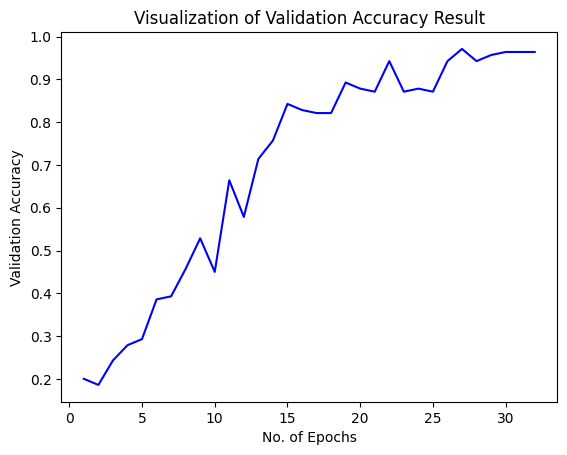

In [27]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Millets_dataset/millets3/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 140 files belonging to 7 classes.


In [29]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

5/5 [==============================] - 24s 118ms/step - loss: 0.3304 - accuracy: 0.9643
Test accuracy: 0.9642857313156128
